In [1]:
import pandas as pd

tweets = pd.read_csv('tweets.csv', encoding = "utf-8")

tweets.head()

,tweet
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...


In [2]:
positive = pd.read_csv('positive.csv' ,encoding = "utf-8")

positive.head()

,score,word
0,3,ممتاز
1,3,رائع
2,3,مبهر
3,3,جميل
4,3,ساحر


In [3]:
negative = pd.read_csv('negative.csv' ,encoding = "utf-8")

negative.tail()

,score,word
1114,-2,صعب
1115,-3,الخيبه
1116,-1,فاحش
1117,-2,زائد
1118,-3,مخيسة


In [4]:
pip install nltk

In [5]:
pip install snowballstemmer

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk 

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from snowballstemmer import stemmer

import string



def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text


def cleaningText(text):
    
    numbers="0123456789"
    arabic_punctuation='''`÷×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
    english_punctuation=string.punctuation
    
    del_chars=english_punctuation+arabic_punctuation+numbers
    text = remove_chars(text, del_chars)
     
    text = text.replace('\n', ' ')  
       
    text = text.strip(' ')  
    return text


def filteringText(tokens_list):  
    
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered


def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

 
def stemmingText(tokens_list): 
    
    ar_stemmer = stemmer("arabic")
    tokens_list_stem = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list_stem

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyad3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
ar_stemmer = stemmer("arabic")

stem = ar_stemmer.stemWord("رايع")
print (stem)

stem = ar_stemmer.stemWord("رائع")
print (stem)

stem = ar_stemmer.stemWord("رائعون")
print (stem)

stem = ar_stemmer.stemWord("رائعين")
print (stem)

رايع
رايع
رايع
رايع


In [8]:
text= "!أنا أحب الذهاب إلى الحديقة، كل يوم 9 صباحاً مع رفاقي هؤلاء "
print(text)

text=cleaningText(text)
print(text)

tokens_list=word_tokenize(text)
print(tokens_list)

tokens_list=filteringText(tokens_list)
print(tokens_list)

tokens_list=stemmingText(tokens_list)
print(tokens_list)

!أنا أحب الذهاب إلى الحديقة، كل يوم 9 صباحاً مع رفاقي هؤلاء 
أنا أحب الذهاب إلى الحديقة كل يوم  صباحاً مع رفاقي هؤلاء
['أنا', 'أحب', 'الذهاب', 'إلى', 'الحديقة', 'كل', 'يوم', 'صباحاً', 'مع', 'رفاقي', 'هؤلاء']
['أحب', 'الذهاب', 'الحديقة', 'يوم', 'صباحاً', 'رفاقي']
['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [9]:
def text_preprocessing(text):
    text = cleaningText(text)
    tokens = word_tokenize(text)
    tokens = filteringText(tokens)
    tokens = stemmingText(tokens)
    return tokens

In [10]:
tweets['tweet_preprocessed'] = tweets['tweet'].apply(text_preprocessing)

tweets.drop_duplicates(subset = 'tweet_preprocessed', inplace = True)

In [11]:
positive['word_preprocessed'] = positive['word'].apply(text_preprocessing)
positive['word_preprocessed'] = positive['word_preprocessed'].apply(toSentence)
 
positive.drop_duplicates(subset = 'word_preprocessed', inplace = True)

positive.dropna(subset = 'word_preprocessed', inplace = True)

In [12]:
negative['word_preprocessed'] = negative['word'].apply(text_preprocessing)
negative['word_preprocessed'] = negative['word_preprocessed'].apply(toSentence)
 
negative.drop_duplicates(subset = 'word_preprocessed', inplace = True)

negative.dropna(subset = 'word_preprocessed', inplace = True)

In [13]:
dict_positive = dict()

for _, row in positive.iterrows():
    word=row['word_preprocessed'].strip()
    dict_positive[word] = int(row['score'])

dict_negative = dict()

for _, row in negative.iterrows():
    word=row['word_preprocessed'].strip()
    dict_negative[word] = int(row['score'])

In [14]:
def get_polarity(words_list):
    score = 0
    for word in words_list:
        if (word in dict_positive):
            score = score + dict_positive[word]
    for word in words_list:
        if (word in dict_negative):
            score = score + dict_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [15]:
for idx, row in tweets.iterrows():
    
    tweets_words=tweets.loc[idx,'tweet_preprocessed']
    
    score, polarity = get_polarity(tweets_words)
    tweets.loc[idx,'polarity_score'] =score
    tweets.loc[idx,'polarity'] =polarity

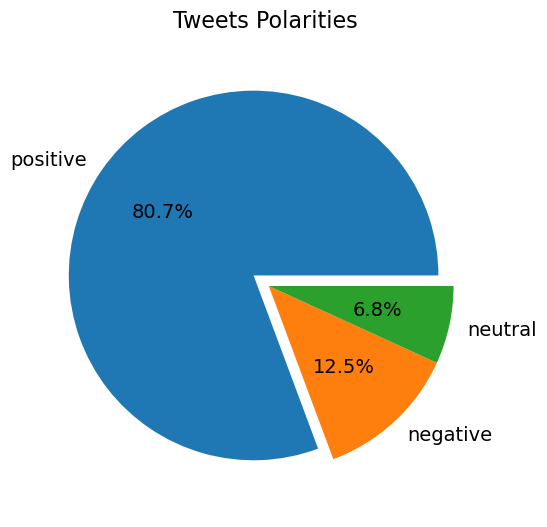

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6))

x = tweets['polarity'].value_counts()

labels = tweets['polarity'].value_counts().index
explode = (0.1, 0, 0)

ax.pie(x = x, labels = labels, autopct = '%1.1f%%', 
       explode = explode, textprops={'fontsize': 14})

ax.set_title('Tweets Polarities ', fontsize = 16, pad = 20)

plt.show()

In [17]:
positive_tweets = tweets[tweets['polarity'] == 'positive']

positive_tweets = positive_tweets.sort_values(by = 'polarity_score', ascending=False)
positive_tweets[['tweet','polarity_score']].head()

,tweet,polarity_score
15124,"""متحف حائل"".. سياحة مشوقة عبر الزمن في ""شتاء ا...",116.0
14642,"قصر جميل لكن مهمل من الدولة\nحكاية قصر ""الخواج...",109.0
16223,والله رهيبة بشكل مو طبيعي وحلوة جداً في الشتاء...,103.0
14613,عرف الموقع التاريخي بـداية بـ قصر جبره والذي ي...,91.0
21153,متحف رائع ويستحق الزيارة لمعرفة تاريخ الأحساء ...,90.0


In [18]:
negative_tweets = tweets[tweets['polarity'] == 'negative']

negative_tweets = negative_tweets.sort_values(by = 'polarity_score', ascending=True)
negative_tweets[['tweet','polarity_score']].head()

,tweet,polarity_score
8667,سيئة للغاية أسعار مبالغ فيها طريقة استخدام الب...,-16.0
1806,سعر تذكرة الدخول ١٠٠ ريال للشخص ولا تتضمن شي ب...,-13.0
6649,للاسف البيك في المنطقه الشرقيه ادارتهم فاشله خ...,-13.0
14038,سعره مبالغ فيه و المحلات تحت مقفله وشبه مهجورة...,-13.0
10916,برد وزحمه وشباب غير مسؤول ولا واعي بان للاخرين...,-11.0


In [19]:
!pip install wordcloud

In [20]:
!pip install arabic_reshaper

In [21]:
!pip install python-bidi

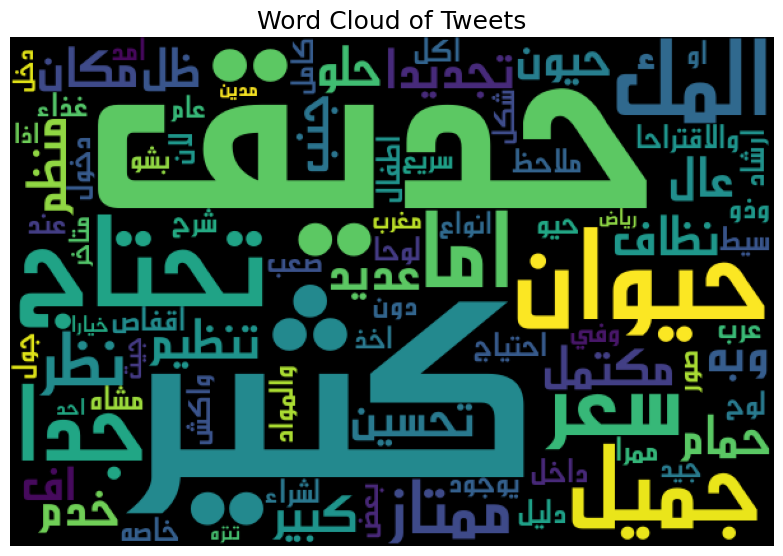

In [22]:
from wordcloud import WordCloud

import arabic_reshaper
from bidi.algorithm import get_display

list_words=''
i=0

for tweet in tweets['tweet_preprocessed']:
    for word in tweet:
        i=i+1
        if i>100:
            break
        list_words += ' '+(word)

reshaped_text = arabic_reshaper.reshape(list_words)
artext = get_display(reshaped_text)

wordcloud = WordCloud(font_path='DroidSansMono.ttf', 
                      width = 600, height = 400, 
                      background_color = 'black', 
                      min_font_size = 10).generate(artext)
fig, ax = plt.subplots(figsize = (8, 6))

ax.set_title('Word Cloud of Tweets', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

C:\Users\eyad3\AppData\Local\Temp\ipykernel_15108\3592174334.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0)


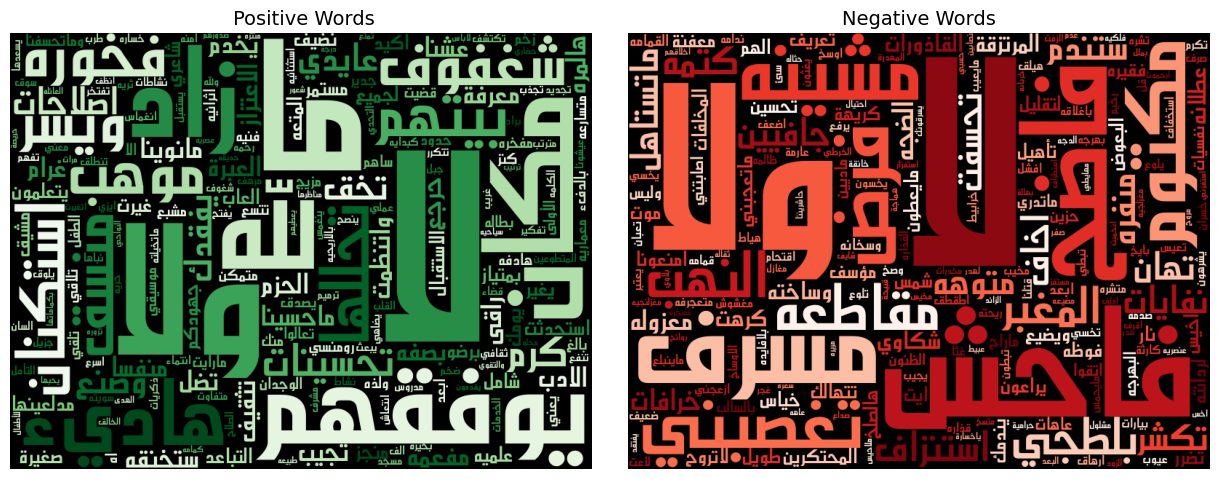

In [23]:
fig, ax = plt.subplots(1, 2,figsize = (12, 10))

positive_words=positive['word']

negative_words=negative['word']

list_words_positive=''

for word in positive_words.values:
    list_words_positive += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_positive)
artext = get_display(reshaped_text)

wordcloud_positive = WordCloud(font_path='DroidSansMono.ttf',
                               width = 800, height = 600, 
                               background_color = 'black', 
                               colormap = 'Greens',
                               min_font_size = 10).generate(artext)
ax[0].set_title(' Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for word in negative_words.values:
    list_words_negative += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_negative)
artext = get_display(reshaped_text)

wordcloud_negative = WordCloud(font_path='DroidSansMono.ttf',
                               width = 800, height = 600, 
                               background_color = 'black', colormap = 'Reds',
                               min_font_size = 10).generate(artext)
ax[1].set_title('Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [24]:
tweets.head()

,tweet,tweet_preprocessed,polarity_score,polarity
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...,"[احد, خيارا, تنزه, مدين, رياض, حديق, حيوان, جي...",5.0,positive
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...,"[حديق, جميل, اطفال, سعر, دخول, ممتاز, واكش, سي...",4.0,positive
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...,"[ممتاز, جدا, عند, ملاحظ, والاقتراحا, 1ف, كثير,...",-5.0,negative
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...,"[حديق, منظم, وبه, عديد, كبير, حيوان, خدم, مكتم...",11.0,positive
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...,"[تجديدا, حلو, مكان, جميل, سعر, مناسب, نتمني, ي...",6.0,positive


In [25]:
sentences = ['Artificial Intelligence Learning', 
                'Human Intelligence', 
                "Machine Learning", 
                "Deep Learning"]

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10)

tokenizer.fit_on_texts(sentences)

print(tokenizer.word_index)

{'learning': 1, 'intelligence': 2, 'artificial': 3, 'human': 4, 'machine': 5, 'deep': 6}


In [26]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[3, 2, 1], [4, 2], [5, 1], [6, 1]]


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads= pad_sequences(sequences, maxlen=3)
print(pads)

[[3 2 1]
 [0 4 2]
 [0 5 1]
 [0 6 1]]


In [28]:
sentences = tweets['tweet_preprocessed'].apply(toSentence)
sentences

0        احد خيارا تنزه مدين رياض حديق حيوان جيت متاخر ...
1        حديق جميل اطفال سعر دخول ممتاز واكش سيط لشراء ...
2        ممتاز جدا عند ملاحظ والاقتراحا 1ف كثير اما جنب...
3        حديق منظم وبه عديد كبير حيوان خدم مكتمل تنظيم ...
4        تجديدا حلو مكان جميل سعر مناسب نتمني يسمح دخول...
                               ...                        
23533                                                مكتوم
23534                                                 مشين
23537                                                 فاضح
23539                                                 مسرف
23544                                                 فاحش
Name: tweet_preprocessed, Length: 19920, dtype: object

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000

sequence_max_len = 50

tokenizer = Tokenizer(num_words=max_words )

tokenizer.fit_on_texts(sentences.values)

seq = tokenizer.texts_to_sequences(sentences.values)

X = pad_sequences(seq, maxlen=sequence_max_len)

In [44]:
print(sentences.values[25]) 
print(X[25]) 

مكان جميل انصح زيار رسوم دخول
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  1 16  6
 80 11]


In [45]:
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}

y = tweets['polarity'].map(polarity_encode).values

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [47]:
import numpy as np

posCount = np.count_nonzero(y_train==2)
neuCount = np.count_nonzero(y_train==1)
negCount = np.count_nonzero(y_train==0)
print(negCount,  neuCount, posCount)     

total_3 = (posCount+ negCount+  neuCount) / 3

weight_for_0 = total_3 / negCount 
weight_for_1 = total_3 / neuCount 
weight_for_2 = total_3 / posCount 
print(weight_for_0, weight_for_1, weight_for_2)

class_weight = {0: weight_for_0, 1: weight_for_1, 2:weight_for_2}

1890 1024 12026
2.634920634920635 4.86328125 0.41410277731581574


In [48]:
from keras.models import Sequential

from keras.layers import Input, Embedding, Dense, LSTM

from keras.optimizers import Adam

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2
learning_rate = 0.001

model = Sequential()

model.add(Input(shape=(sequence_max_len,)))

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = sequence_max_len))

model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))

model.add(Dense(units = 3, activation = 'softmax'))

In [49]:
model.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = Adam(learning_rate = learning_rate), 
                metrics = ['accuracy'])

In [50]:
epochs=10
batch_size=128

history = model.fit(X_train, y_train, class_weight=class_weight,
                             epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test))

Epoch 1/10
117/117 [==============================] - 4s 19ms/step - loss: 0.9902 - accuracy: 0.5750 - val_loss: 0.6879 - val_accuracy: 0.7671
Epoch 2/10
117/117 [==============================] - 2s 16ms/step - loss: 0.6695 - accuracy: 0.8211 - val_loss: 0.3832 - val_accuracy: 0.8446
Epoch 3/10
117/117 [==============================] - 2s 16ms/step - loss: 0.4820 - accuracy: 0.8803 - val_loss: 0.3482 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 2s 16ms/step - loss: 0.3647 - accuracy: 0.9106 - val_loss: 0.3262 - val_accuracy: 0.8622
Epoch 5/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2913 - accuracy: 0.9266 - val_loss: 0.2930 - val_accuracy: 0.8958
Epoch 6/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2297 - accuracy: 0.9413 - val_loss: 0.3731 - val_accuracy: 0.8683
Epoch 7/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2063 - accuracy: 0.9476 - val_loss: 0.3427 - val_accuracy: 0.8857

In [51]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.9649263620376587
Validation Accuracy: 0.8931726813316345


In [52]:
def create_model(embed_dim = 32, 
                 hidden_unit = 16, 
                 dropout_rate = 0.2, 
                 learning_rate = 0.001):
    
    model = Sequential()
    
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = sequence_max_len))
    
    model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))
    
    model.add(Dense(units = 3, activation = 'softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = Adam(learning_rate = learning_rate), 
                  metrics = ['accuracy'])
    return model

In [53]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [54]:
from scikeras.wrappers import KerasClassifier

model_keras = KerasClassifier(model = create_model, epochs = 25, batch_size=128)

In [55]:
param_grid = {
    'model__embed_dim': [32, 64],
    'model__hidden_unit': [16, 32, 64 ],
    'model__dropout_rate': [0.2, 0.5],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = model_keras, param_grid = param_grid, cv = 5)
grid_result = grid.fit(X_train, y_train)

results_df = pd.DataFrame(grid_result.cv_results_)

results_df.to_csv('grid_search_results.csv', index=False)

print("Best parameters: ", grid_result.best_params_)

print("Best accuracy: ", grid_result.best_score_)
'''

In [56]:
model = create_model(embed_dim = 64, 
                        hidden_unit = 64, 
                        dropout_rate = 0.2, 
                        learning_rate = 0.001)


history = model.fit(X_train, y_train, class_weight=class_weight,
                             epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test, y_test))

Epoch 1/10
117/117 [==============================] - 7s 46ms/step - loss: 0.8962 - accuracy: 0.6736 - val_loss: 0.4768 - val_accuracy: 0.8078
Epoch 2/10
117/117 [==============================] - 5s 42ms/step - loss: 0.5409 - accuracy: 0.8618 - val_loss: 0.3642 - val_accuracy: 0.8592
Epoch 3/10
117/117 [==============================] - 5s 42ms/step - loss: 0.3769 - accuracy: 0.9084 - val_loss: 0.2855 - val_accuracy: 0.8821
Epoch 4/10
117/117 [==============================] - 5s 41ms/step - loss: 0.2757 - accuracy: 0.9293 - val_loss: 0.3774 - val_accuracy: 0.8464
Epoch 5/10
117/117 [==============================] - 5s 43ms/step - loss: 0.2067 - accuracy: 0.9436 - val_loss: 0.3499 - val_accuracy: 0.8741
Epoch 6/10
117/117 [==============================] - 5s 42ms/step - loss: 0.1679 - accuracy: 0.9543 - val_loss: 0.3238 - val_accuracy: 0.8972
Epoch 7/10
117/117 [==============================] - 5s 40ms/step - loss: 0.1398 - accuracy: 0.9642 - val_loss: 0.3315 - val_accuracy: 0.8972

In [57]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.9775100350379944
Validation Accuracy: 0.899397611618042


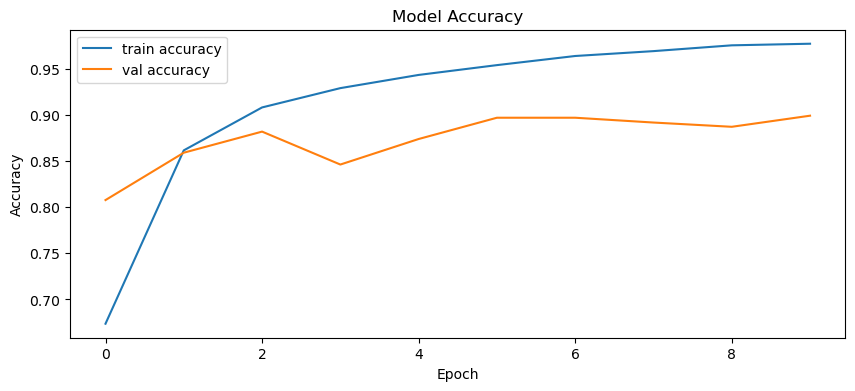

In [58]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [59]:
model.save('sa_model.keras')

In [60]:
import pickle

tokenizer_path = 'sa_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [61]:
from keras.models import load_model
import pickle

def classify_tweets(tweets, model_path, tokenizer_path, sequence_max_len):
    processed_tweets = []
    for x in tweets:
        
        y = text_preprocessing(x)

        y = toSentence(y)
        
        processed_tweets.append(y)

    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)

    text_2_seq = tokenizer.texts_to_sequences(processed_tweets)

    text_pad = pad_sequences(text_2_seq, maxlen=sequence_max_len)

    predictions=model.predict(text_pad)

    sentiments = []
    for pred in predictions:
        max = np.argmax(pred, axis=0)
        if max == 0:
            sentiments.append("Negative")
        elif max == 1:
            sentiments.append("Neutral")
        else:
            sentiments.append("Positive")
    return sentiments

In [62]:
new_tweets=["مكان وسخ",
        "مكان رائع وجميل",
        "من أجمل الأماكن التي زرتها بحياتي",
        "يمكن التسوق فيها"]

predictions = classify_tweets(new_tweets,'sa_model.keras','sa_tokenizer',50)

for sentence, prediction in zip(new_tweets, predictions):
    print(f"Sentence: {sentence} - Sentiment: {prediction}  ")

1/1 [==============================] - 0s 397ms/step
Sentence: مكان وسخ - Sentiment: Neutral  
Sentence: مكان رائع وجميل - Sentiment: Positive  
Sentence: من أجمل الأماكن التي زرتها بحياتي - Sentiment: Positive  
Sentence: يمكن التسوق فيها - Sentiment: Neutral  
